In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import zscore
from IPython.display import display

data = pd.read_csv('/content/sample_data/Housing price. .csv')


In [15]:
from IPython.display import display

print("===  Data Exploration ===")
print(f"Data Shape: {data.shape}")
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

print("\n===  Data Sample ===")
display(data.head(8))

print("\n===  Descriptive Statistics ===")
display(data.describe())

print("\n===  Categorical Columns ===")
categorical_data = data.select_dtypes(include=['object', 'category'])
display(categorical_data.head())

print("\n===  Data Types ===")
print(data.dtypes)

===  Data Exploration ===
Data Shape: (545, 13)
Rows: 545
Columns: 13

===  Data Sample ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished



===  Descriptive Statistics ===


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



===  Categorical Columns ===


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished



===  Data Types ===
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [3]:
data['area'] = data['area'].fillna(data['area'].mean())
data['price'] = data['price'].fillna(data['price'].mean())
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].mean())
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].mean())
data['stories'] = data['stories'].fillna(data['stories'].mean())
data['parking'] = data['parking'].fillna(data['parking'].mean())

print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


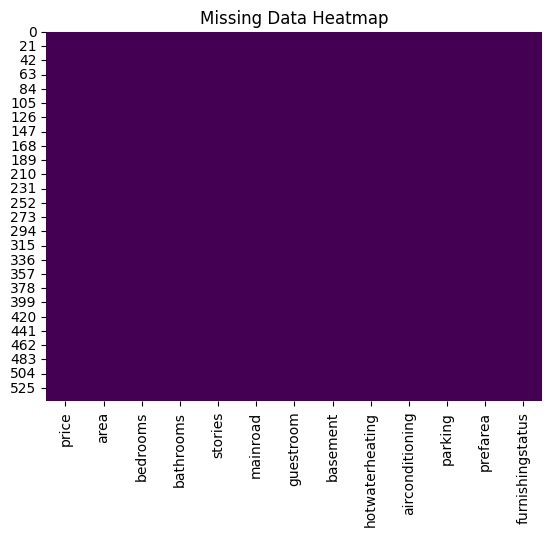

In [4]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


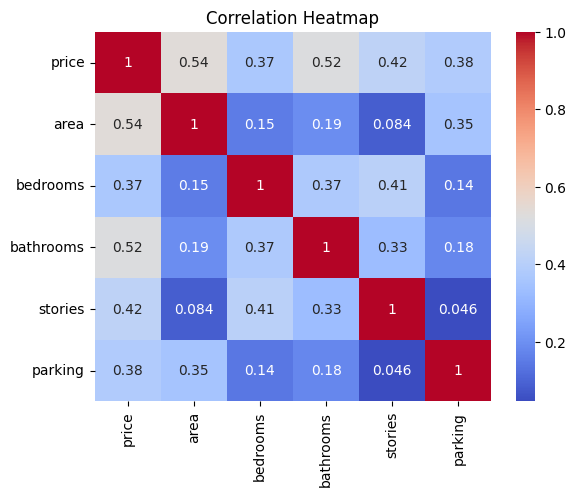

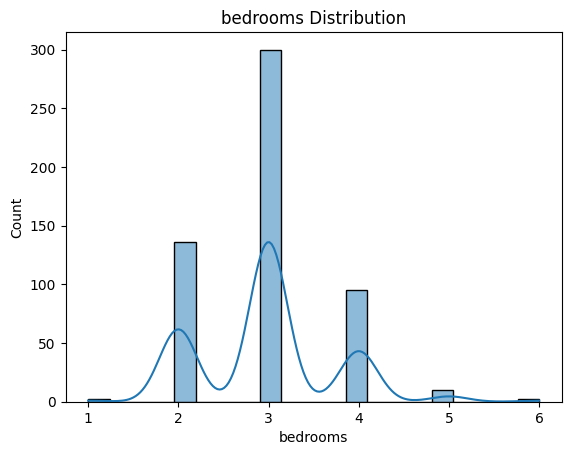

bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64
stories               1             2             3             4
guestroom                                                        
no         3.946315e+06  4.525015e+06  5.626147e+06  7.214531e+06
yes        5.286474e+06  5.848174e+06  6.088600e+06  7.191864e+06
mainroad
yes    468
no      77
Name: count, dtype: int64


In [16]:

numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.histplot(data['bedrooms'], kde=True)
plt.title('bedrooms Distribution')
plt.show()

grouped_data = data.groupby('bedrooms')['price'].mean()
print(grouped_data)

pivot_table = data.pivot_table(values='price', index='guestroom', columns='stories', aggfunc='mean')
print(pivot_table)

mainroad_counts = data['mainroad'].value_counts()
print(mainroad_counts)

In [18]:
pivot_table = data.pivot_table( values='price', index='furnishingstatus', columns='area', aggfunc='sum')
pivot_table


area,1650,1700,1836,1905,1950,2000,2015,2135,2145,2160,...,11175,11410,11440,11460,12090,12900,12944,13200,15600,16200
furnishingstatus,,,,,,,,,,,,,,,,,,,,,
furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13517000.0,NaN,...,7000000.0,5110000.0,NaN,NaN,6790000.0,4900000.0,NaN,16730000.0,NaN,NaN
semi-furnished,NaN,NaN,2275000.0,4340000.0,NaN,2660000.0,3850000.0,NaN,NaN,3080000.0,...,NaN,NaN,7343000.0,5873000.0,NaN,NaN,NaN,NaN,5943000.0,NaN
unfurnished,3150000.0,1890000.0,NaN,NaN,5670000.0,NaN,NaN,3500000.0,8120000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3500000.0,NaN,NaN,10150000.0


In [19]:
stacked = data.stack()
stacked

0    price                  13300000
     area                       7420
     bedrooms                      4
     bathrooms                     2
     stories                       3
                            ...     
544  hotwaterheating              no
     airconditioning              no
     parking                       0
     prefarea                     no
     furnishingstatus    unfurnished
Length: 7085, dtype: object

In [20]:
unstacked = stacked.unstack()
unstacked

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [21]:
exploded = data.explode('guestroom')
exploded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [22]:
melted_data = data.melt(id_vars=['price'], var_name='features', value_name='Value')
melted_data


,price,features,Value
0,13300000,area,7420
1,12250000,area,8960
2,12250000,area,9960
3,12215000,area,7500
4,11410000,area,7420
...,...,...,...
6535,1820000,furnishingstatus,unfurnished
6536,1767150,furnishingstatus,semi-furnished
6537,1750000,furnishingstatus,unfurnished
6538,1750000,furnishingstatus,furnished


In [23]:
dummies = pd.get_dummies(data, columns=['mainroad'], drop_first=True)
dummies


,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,True
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,True
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished,True
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished,True
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,no,yes,no,no,2,no,unfurnished,True
541,1767150,2400,3,1,1,no,no,no,no,0,no,semi-furnished,False
542,1750000,3620,2,1,1,no,no,no,no,0,no,unfurnished,True
543,1750000,2910,3,1,1,no,no,no,no,0,no,furnished,False


In [24]:
result = pd.crosstab(data['guestroom'], data['parking'])
result

parking,0,1,2,3
guestroom,,,,
no,252,99,86,11
yes,47,27,22,1


In [25]:
data['Bins'] = pd.cut(data['bedrooms'], bins=[1, 3, 5], labels=['Low', 'High'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Bins
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,High
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,High
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,Low
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,High
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,Low
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,Low
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,Low
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,Low


In [26]:
label_encoder = LabelEncoder()
data['mainroad'] = label_encoder.fit_transform(data['mainroad'])


one_hot = pd.get_dummies(data[['prefarea', 'airconditioning']])
data = pd.concat([data, one_hot], axis=1)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Bins,prefarea_no,prefarea_yes,airconditioning_no,airconditioning_yes
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished,High,False,True,False,True
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished,High,True,False,False,True
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished,Low,False,True,True,False
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished,High,False,True,False,True
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished,High,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished,Low,True,False,True,False
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished,Low,True,False,True,False
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished,Low,True,False,True,False
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished,Low,True,False,True,False


In [30]:
data.rename(columns={'stories': 'floors'}, inplace=True)
data


,price,area,bedrooms,bathrooms,floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Bins,prefarea_no,prefarea_yes,airconditioning_no,airconditioning_yes,Z_Score
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished,High,False,True,False,True,4.566365
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished,High,True,False,False,True,4.004484
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished,Low,False,True,True,False,4.004484
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished,High,False,True,False,True,3.985755
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished,High,True,False,False,True,3.554979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished,Low,True,False,True,False,-1.576868
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished,Low,True,False,True,False,-1.605149
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished,Low,True,False,True,False,-1.614327
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished,Low,True,False,True,False,-1.614327


In [31]:
data['bedrooms'] = data['bedrooms'].astype('float')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   price                545 non-null    int64   
 1   area                 545 non-null    int64   
 2   bedrooms             545 non-null    float64 
 3   bathrooms            545 non-null    int64   
 4   floors               545 non-null    int64   
 5   mainroad             545 non-null    int64   
 6   guestroom            545 non-null    object  
 7   basement             545 non-null    object  
 8   hotwaterheating      545 non-null    object  
 9   airconditioning      545 non-null    object  
 10  parking              545 non-null    int64   
 11  prefarea             545 non-null    object  
 12  furnishingstatus     545 non-null    object  
 13  Bins                 541 non-null    category
 14  prefarea_no          545 non-null    bool    
 15  prefarea_yes         54

In [ ]:
df1 = pd.DataFrame({'area': [7500, 6040, 5400], 'bedrooms': [4, 2, 2]})
df2 = pd.DataFrame({'area': [7500, 6040, 5400], 'mainroad': ['yes', 'no', 'yes']})
df_merged = pd.merge(df1, df2, on='area')
df_merged

,area,bedrooms,mainroad
0,7500,4,yes
1,6040,2,no
2,5400,2,yes


In [32]:
train = data.sample(frac=0.7, random_state=42)
test = data.drop(train.index)
display(train)
display(test)


,price,area,bedrooms,bathrooms,floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Bins,prefarea_no,prefarea_yes,airconditioning_no,airconditioning_yes,Z_Score
316,4060000,5900,4.0,2,2,0,no,yes,no,no,1,no,unfurnished,High,True,False,True,False,-0.378188
77,6650000,6500,3.0,2,3,1,no,no,no,yes,0,yes,furnished,Low,False,True,False,True,1.007785
360,3710000,4040,2.0,1,1,1,no,no,no,no,0,no,semi-furnished,Low,True,False,True,False,-0.565482
90,6440000,5000,3.0,1,2,1,no,no,no,yes,0,no,semi-furnished,Low,True,False,False,True,0.895409
493,2800000,3960,3.0,1,1,1,no,no,no,no,0,no,furnished,Low,True,False,True,False,-1.052446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,8400000,7950,5.0,2,2,1,no,yes,yes,no,2,no,unfurnished,High,True,False,True,False,1.944253
170,5250000,5500,3.0,2,1,1,no,yes,no,no,0,no,semi-furnished,Low,True,False,True,False,0.258610
142,5600000,10500,4.0,2,2,1,no,no,no,no,1,no,semi-furnished,High,True,False,True,False,0.445904
453,3150000,3069,2.0,1,1,1,no,no,no,no,1,no,unfurnished,Low,True,False,True,False,-0.865152


,price,area,bedrooms,bathrooms,floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Bins,prefarea_no,prefarea_yes,airconditioning_no,airconditioning_yes,Z_Score
1,12250000,8960,4.0,4,4,1,no,no,no,yes,3,no,furnished,High,True,False,False,True,4.004484
4,11410000,7420,4.0,1,2,1,yes,yes,no,yes,2,no,furnished,High,True,False,False,True,3.554979
8,9870000,8100,4.0,1,2,1,yes,yes,no,yes,2,yes,furnished,High,False,True,False,True,2.730887
13,9240000,3500,4.0,2,2,1,no,no,yes,no,2,no,furnished,High,True,False,True,False,2.393758
14,9240000,7800,3.0,2,2,1,no,no,no,no,0,yes,semi-furnished,Low,False,True,True,False,2.393758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2240000,1950,3.0,1,1,0,no,no,yes,no,0,no,unfurnished,Low,True,False,True,False,-1.352116
534,2100000,3000,4.0,1,2,1,no,no,no,no,0,no,unfurnished,High,True,False,True,False,-1.427033
536,1960000,3420,5.0,1,2,0,no,no,no,no,0,no,unfurnished,High,True,False,True,False,-1.501951
539,1855000,2990,2.0,1,1,0,no,no,no,no,1,no,unfurnished,Low,True,False,True,False,-1.558139
